In [16]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = scipy.io.loadmat('../data/TsukubaHandSize24x24.mat')
data = data['data']
arr = data
print(arr.shape)

(24, 24, 60, 7, 30, 100)


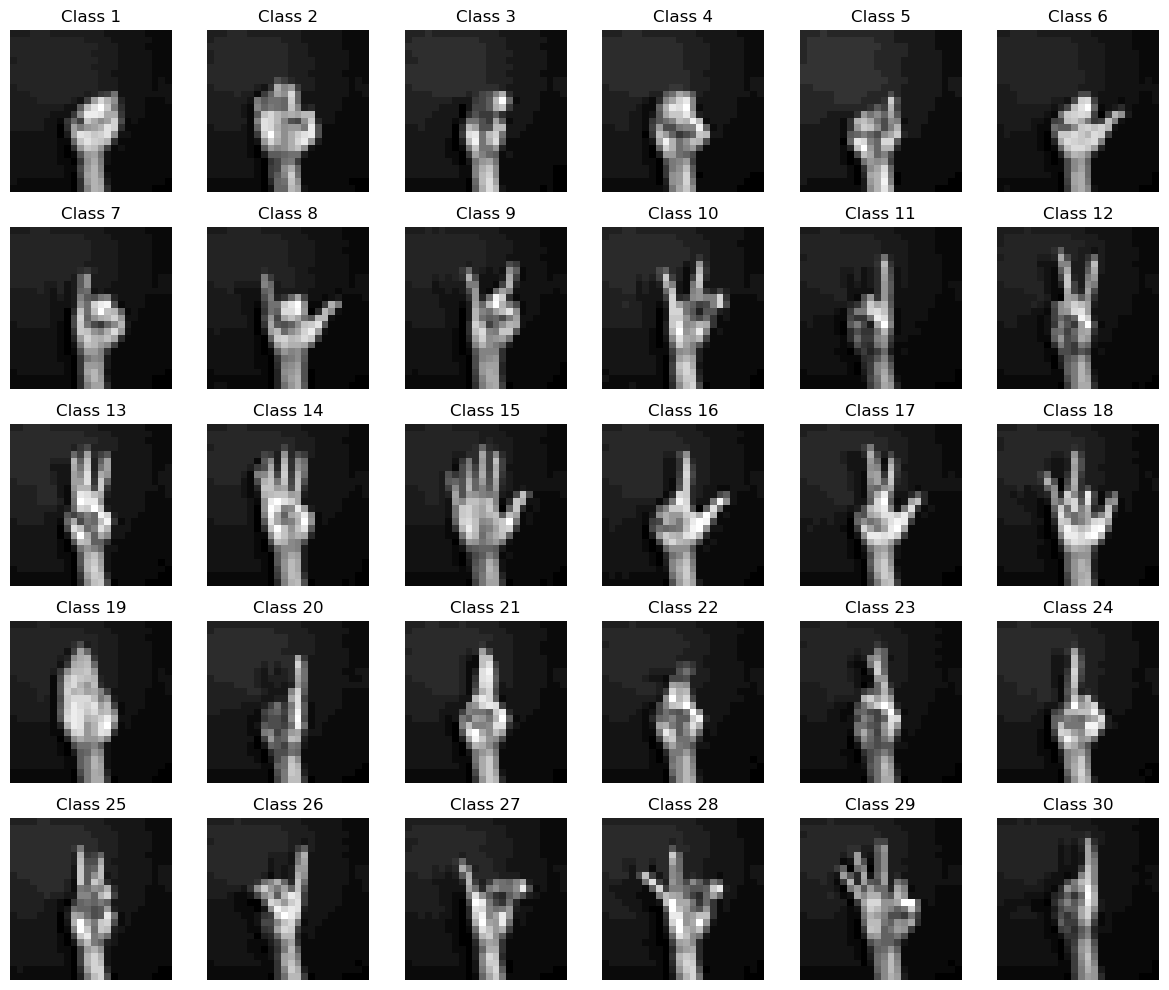

In [17]:
def display_one_image_per_class(data):
    num_classes = 30
    fig, axes = plt.subplots(5, 6, figsize=(12, 10))
    for i in range(num_classes):
        image = data[:, :, 0, 0, i, 0]  # Select one image from each class
        ax = axes[i // 6, i % 6]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Class {i + 1}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

display_one_image_per_class(data)

In [19]:
def split_train_test(data, test_ratio=0.2):
    np.random.shuffle(data)
    num_people = data.shape[5]
    num_test = int(num_people * test_ratio)
    test_data = data[:, :, :, :, :, :num_test]
    train_data = data[:, :, :, :, :, num_test:]
    return train_data, test_data

train_data, test_data = split_train_test(data)

def reshape_dataset(data: np.ndarray, n_subjects: int) -> np.ndarray:
    # Combine the first reshaping and squeezing operations
    data = data.reshape(576, 60 * 7, 30, n_subjects)
    
    # Combine the second reshaping and squeezing operations
    data = data.reshape(-1, 420 * 30, n_subjects)
    
    return data


def create_labels(n_subjects: int):
    # Create a range of values from 1 to 30
    values = np.arange(1, 31)

    # Repeat each value 420 times
    labels = np.repeat(values, 420)

    # Verify the shape of the resulting array
    return np.tile(labels, n_subjects)

train_data = reshape_dataset(data=train_data, n_subjects=80)
test_data = reshape_dataset(data=test_data, n_subjects=20)
train_data = train_data.reshape(-1, 12600*80)
test_data = test_data.reshape(-1, 12600*20)
train_labels = create_labels(n_subjects=80)
test_lablels = create_labels(n_subjects=20)
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_lablels.shape)

(576, 1008000)
(1008000,)
(576, 252000)
(252000,)
